In [1]:
import os
import math
import numpy as np
import pandas as pd

In [2]:
import dask.dataframe as dd

In [3]:
os.getcwd()
os.chdir('C:/Users/Samruddhi/Desktop/Food Supply Prediction')

In [4]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test_QoiMO9B.csv')

In [5]:
print('Observation in train dataset:',len(train))
print('Observation in test dataset:',len(test))

Observation in train dataset: 456548
Observation in test dataset: 32573


In [6]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


# Missing Value Analysis

In [7]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

# Feature Selection

In [8]:
train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [9]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [10]:
con_var= ['id', 'week','checkout_price', 'base_price']
cat_var= ['center_id', 'meal_id','emailer_for_promotion', 'homepage_featured']

In [11]:
# Continous Variable
# Variance Inflation Factor (VIF)

In [12]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
outcome, predictors = dmatrices('num_orders ~id+ week +checkout_price + base_price' ,train, return_type='dataframe')

In [14]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]  #getting VIF values 
vif["features"] = predictors.columns

In [15]:
vif # Remove base_price variable

,VIF,features
0,83.766750,Intercept
1,1.000021,id
2,1.000829,week
3,10.983206,checkout_price
4,10.984489,base_price


In [16]:
# Categorical Variables
# ANOVA

In [17]:
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
mod= ols('num_orders ~ center_id+ meal_id + emailer_for_promotion + homepage_featured' ,train).fit()
ano_table= sm.stats.anova_lm(mod, typ=2)
print(ano_table)

                             sum_sq        df             F    PR(>F)
center_id              2.133055e+08       1.0   1547.612154  0.000000
meal_id                1.772430e+06       1.0     12.859653  0.000336
emailer_for_promotion  2.241670e+09       1.0  16264.165311  0.000000
homepage_featured      2.909150e+09       1.0  21106.991447  0.000000
Residual               6.292475e+10  456543.0           NaN       NaN


In [19]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_orders   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                 1.567e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:10:48   Log-Likelihood:            -3.3492e+06
No. Observations:              456548   AIC:                         6.698e+06
Df Residuals:                  456543   BIC:                         6.698e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               240.2066      2.321    103.510      0.000     235.658     244.755
center_id                -0.4702      0.012    -39.340      0.000      -0.494      -0.447
meal_id                   0.0036      0.001      3.586      0.000       0.002       0.006
emailer_for_promotion   278.7912      2.186    127.531      0.000     274.507     283.076
homepage_featured       278.0564      1.914    145.282      0.000     274.305     281.808
==============================================================================
Omnibus:                   581019.568   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        320987459.528
Skew:                           6.609   Prob(JB):                         0.00
Kurtosis:                     132.225   Cond. No.                     9.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
train=train.drop('base_price',axis=1)
test= test.drop('base_price', axis=1)

# Outlier Analysis

In [21]:
import matplotlib.pyplot as plt

In [22]:
train.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,0,0,177
1,1466964,1,55,1993,136.83,0,0,270
2,1346989,1,55,2539,134.86,0,0,189
3,1338232,1,55,2139,339.50,0,0,54
4,1448490,1,55,2631,243.50,0,0,40


{'whiskers': [<matplotlib.lines.Line2D at 0x24964ddee80>,
 'caps': [<matplotlib.lines.Line2D at 0x24964df9550>,
 'boxes': [<matplotlib.lines.Line2D at 0x24964ddea58>],
 'medians': [<matplotlib.lines.Line2D at 0x24964df9be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24964df9f28>],
 'means': []}

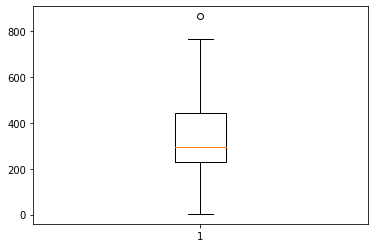

In [23]:
plt.boxplot(train['checkout_price'])

In [24]:
col_names=['checkout_price']
len(train)

456548

In [25]:
for i in col_names:
    q75,q25 = np.percentile(train[i],[75,25])     #removing outliers using boxplot
    iqr= q75 - q25      
    mini= q25 - (iqr*1.5)
    maxi= q75 + (iqr*1.5)
    train.loc[train[i]< mini,i]=np.nan
    train.loc[train[i]> maxi,i]=np.nan
    train= train.dropna()

In [26]:
len(train)

456547

# Feature Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler= MinMaxScaler()

In [29]:
train[['id', 'week','center_id', 'meal_id','checkout_price']]= scaler.fit_transform(train[['id', 'week','center_id', 'meal_id','checkout_price']])
test[['id', 'week','center_id', 'meal_id','checkout_price']]= scaler.fit_transform(test[['id', 'week','center_id', 'meal_id','checkout_price']])

In [30]:
train.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders
0,0.759122,0.0,0.255682,0.434530,0.175127,0,0,177
1,0.933930,0.0,0.255682,0.491552,0.175127,0,0,270
2,0.693979,0.0,0.255682,0.779831,0.172550,0,0,189
3,0.676465,0.0,0.255682,0.568638,0.440277,0,0,54
4,0.896982,0.0,0.255682,0.828405,0.314682,0,0,40


In [34]:
test.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured
0,0.056304,0.0,0.255682,0.434530,0.086266,0,0
1,0.254283,0.0,0.255682,0.491552,0.088178,0,0
2,0.425320,0.0,0.255682,0.779831,0.085338,0,0
3,0.165255,0.0,0.255682,0.828405,0.090005,0,0
4,0.801825,0.0,0.255682,0.098205,0.091831,0,0


# Sampling

In [35]:
train.shape

(456547, 8)

In [36]:
# Stratified Sampling
from sklearn.model_selection import train_test_split

In [37]:
train.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders
0,0.759122,0.0,0.255682,0.434530,0.175127,0,0,177
1,0.933930,0.0,0.255682,0.491552,0.175127,0,0,270
2,0.693979,0.0,0.255682,0.779831,0.172550,0,0,189
3,0.676465,0.0,0.255682,0.568638,0.440277,0,0,54
4,0.896982,0.0,0.255682,0.828405,0.314682,0,0,40


In [38]:
y= train['emailer_for_promotion']

In [39]:
Rest, Sample = train_test_split(train,test_size=0.2, stratify=y)

In [40]:
Sample.shape

(91310, 8)

In [41]:
Sample.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders
103449,0.662623,0.243056,0.460227,0.365364,0.375556,0,0,365
276693,0.319685,0.625000,0.079545,0.866948,0.376864,0,0,256
332663,0.109564,0.743056,0.494318,0.098205,0.196622,0,0,26
207216,0.600913,0.472222,0.403409,0.365364,0.247383,0,1,1230
368989,0.257471,0.819444,0.721591,0.024815,0.343909,1,1,3739


In [153]:
#train.to_csv('new_train.csv',index= False)
#test.to_csv('new_test.csv', index=False)

In [152]:
train= dd.read_csv('new_train.csv')
test= dd.read_csv('new_test.csv')

# Model Selection

In [156]:
from sklearn import metrics
from sklearn.model_selection import KFold

In [157]:
X= train[['id', 'week','center_id', 'meal_id','checkout_price','emailer_for_promotion', 'homepage_featured']]  #independent variables
Y= train[['num_orders']]  #target variable
kfold= KFold(n_splits=10, random_state=7)

In [45]:
# Linear Regression

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [47]:
LR= LinearRegression()

In [48]:
r2= cross_val_score(LR,X,Y,cv=kfold,scoring='r2').mean()
mae= cross_val_score(LR,X,Y,cv=kfold,scoring='neg_mean_absolute_error').mean()
mse= cross_val_score(LR,X,Y,cv=kfold,scoring='neg_mean_squared_error').mean()
rmse= math.sqrt(-mse)

In [49]:
print('Rsquared: ',r2,' MAE: ', -mae,' RMSE: ', rmse)

Rsquared:  0.18909929278043897  MAE:  206.30461489148925  RMSE:  366.02232847179016


In [50]:
# KNN

In [38]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
KNN= KNeighborsRegressor()

In [53]:
r2= cross_val_score(KNN,X,Y,cv=kfold,scoring='r2').mean()
mae= cross_val_score(KNN,X,Y,cv=kfold,scoring='neg_mean_absolute_error').mean()
mse= cross_val_score(KNN,X,Y,cv=kfold,scoring='neg_mean_squared_error').mean()
rmse= math.sqrt(-mse)

In [54]:
print('Rsquared: ',r2,' MAE: ',-mae,' RMSE: ',rmse)

Rsquared:  0.3388881632949813  MAE:  169.74196911619757  RMSE:  330.2870021759468


In [55]:
# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
DT= DecisionTreeRegressor()

In [58]:
r2= cross_val_score(DT,X,Y,cv=kfold,scoring='r2').mean()
mae= cross_val_score(DT,X,Y,cv=kfold,scoring='neg_mean_absolute_error').mean()
mse= cross_val_score(DT,X,Y,cv=kfold,scoring='neg_mean_squared_error').mean()
rmse= math.sqrt(-mse)

In [59]:
print('Rsquared: ',r2,' MAE: ',-mae,' RMSE: ',rmse)

Rsquared:  0.39388872938301356  MAE:  126.95437520534442  RMSE:  314.48528047096084


In [60]:
# Random Forests

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
RF= RandomForestRegressor(n_estimators=200)

In [63]:
r2= cross_val_score(RF,X,Y,cv=kfold,scoring='r2').mean()
mae= cross_val_score(RF,X,Y,cv=kfold,scoring='neg_mean_absolute_error').mean()
mse= cross_val_score(RF,X,Y,cv=kfold,scoring='neg_mean_squared_error').mean()
rmse= math.sqrt(-mse)

C:\Users\Samruddhi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Samruddhi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Samruddhi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Samruddhi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A co

In [64]:
print('Rsquared: ',r2,' MAE: ',-mae,' RMSE: ',rmse)

Rsquared:  0.6953377601261203  MAE:  96.16670079947431  RMSE:  223.97438459288577


# Model Development

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib

C:\Users\Samruddhi\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [155]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [1,2,3,4,5,6,7,8,9,10]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [158]:
# Using random grid to search for the best hyperparameters
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, Y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


NotImplementedError: 'DataFrame.iloc' only supports selecting columns. It must be used like 'df.iloc[:, column_indexer]'.

In [ ]:
rf_random.best_params_

In [33]:
import random
from sklearn.model_selection import train_test_split

In [34]:
train.shape

(456547, 8)

In [35]:
random.seed(123)
X = train.values[:, 0:7]
Y = train.values[:,7]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [159]:
# Model developing

In [161]:
RF_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [162]:
RF_predict= RF_model.predict(test)

In [163]:
RF_predict

array([261.518, 259.2  , 189.444, ..., 356.166, 310.266, 310.446])

In [42]:
# Train teat split

In [50]:
import random
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [44]:
random.seed(123)
X = train.values[:, 0:7]
Y = train.values[:,7]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [58]:
RF = RandomForestRegressor(n_estimators=500)

In [59]:
RF_model= RF.fit(X_train,y_train)

In [60]:
RF_predict= RF_model.predict(X_test)

In [61]:
rsquared= metrics.r2_score(y_test,RF_predict)
MAE= metrics.mean_absolute_error(y_test,RF_predict)
RMSE= math.sqrt(metrics.mean_squared_error(y_test,RF_predict))

In [62]:
print('Rsquared: ',rsquared,' MAE: ',MAE,' RMSE: ',RMSE)

Rsquared:  0.7812139404843312  MAE:  80.04533667725332  RMSE:  186.05429338489287


In [63]:
# Final Model

In [44]:
from sklearn.externals import joblib

In [45]:
random.seed(123)
X = train.values[:, 0:7]
Y = train.values[:,7]

In [46]:
RF = RandomForestRegressor(n_estimators=200)

In [47]:
RF_model= RF.fit(X,Y)

In [48]:
RF_predict = RF_model.predict(test)

In [50]:
RF_predict[0]

245.03

In [69]:
predictions=pd.DataFrame(RF_predict)

In [59]:
test= pd.read_csv('test_QoiMO9B.csv')

In [60]:
final_test= test.copy()

In [72]:
final_test['num_orders']= predictions.values

In [73]:
final_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1028232,146,55,1885,158.11,159.11,0,0,245.030
1,1127204,146,55,1993,160.11,159.11,0,0,248.235
2,1212707,146,55,2539,157.14,159.14,0,0,173.290
3,1082698,146,55,2631,162.02,162.02,0,0,108.000
4,1400926,146,55,1248,163.93,163.93,0,0,125.175


In [74]:
final_test= final_test.iloc[:,[0,8]]

In [75]:
final_test.head()

,id,num_orders
0,1028232,245.030
1,1127204,248.235
2,1212707,173.290
3,1082698,108.000
4,1400926,125.175


In [76]:
final_test.to_csv('submit_test.csv',index= False)